# The Sparks Foundation

## Graduate Rotational Internship Program  - GRIPJAN21

## Task 2  From the given 'Iris' dataset, Predict the optimum number of clusters and represent it visually.

# Author : Kishan M

In [15]:
#Importing the required Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the iris dataset
iris = datasets.load_iris()
iris_file = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_file.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
iris_file.describe()
#count tells that all the 4 features have 150 rows
#in general ,From Mean we can say that sepal is larger than petal.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris_file.corr() #correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [18]:
iris_file #Shows the amount of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
iris_file.describe() #summary of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#  Model Building

In [20]:
x = iris_file.iloc[:, [0, 1, 2, 3]].values

In [21]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

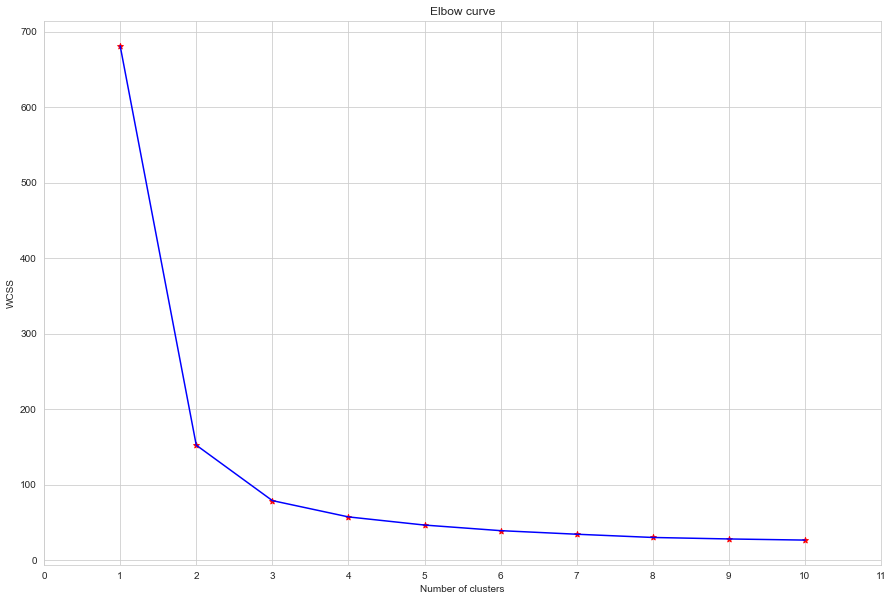

In [22]:
plt.figure(figsize=(15,10)) #Ploting Elbow Method
plt.scatter(range(1, 11), wcss,marker="*",c="red")       
plt.plot(range(1, 11), wcss,c="blue")
plt.xlabel("Number of clusters")           
plt.ylabel("WCSS")
plt.xticks(range(0,12,1)) #for value of k from 0 to 11 in graph
plt.title("Elbow curve")

# Apply K Means 

In [23]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, 
               precompute_distances = 'auto', tol = 0.0001, verbose = 0)
y_km = k_means.fit_predict(x)

In [24]:
y_km #predicted values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# K Means Cluster 

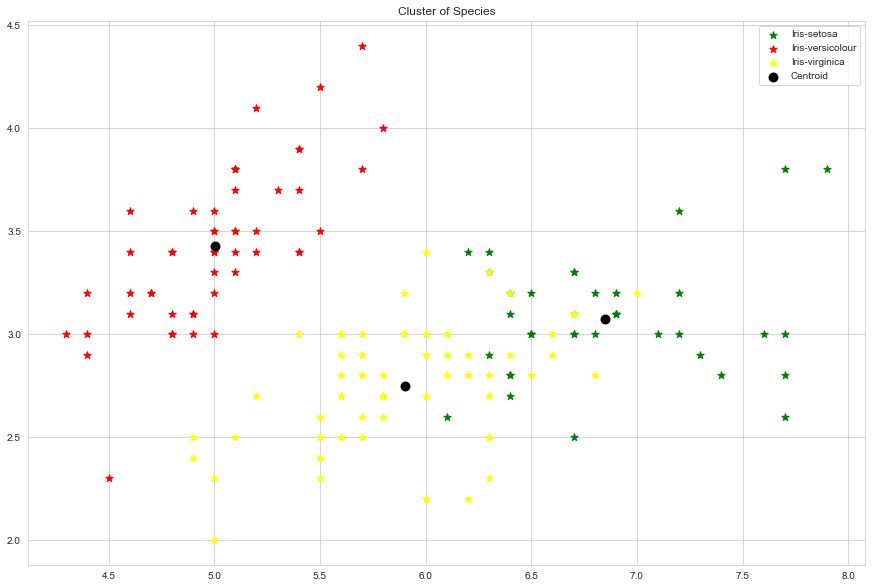

In [25]:
sns.set_style("whitegrid");
plt.figure(figsize=(15,10))
plt.scatter(x[y_km==0,0], x[y_km==0,1],s = 60,c = 'green', label = 'Iris-setosa' ,marker="*")
plt.scatter(x[y_km==1,0], x[y_km==1,1],s = 60,c = 'red', label = 'Iris-versicolour' ,marker="*")
plt.scatter(x[y_km==2,0], x[y_km==2,1],s = 60,c = 'yellow', label = 'Iris-virginica' ,marker="*")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s = 80, c = 'black', label = 'Centroid')
plt.title("Cluster of Species")
plt.legend()
plt.show()

## I have successfully predicted clusters using Unsupervised ML Algorithm K-Means Clusturing and was able to evaluate the model's clustering accuracy score